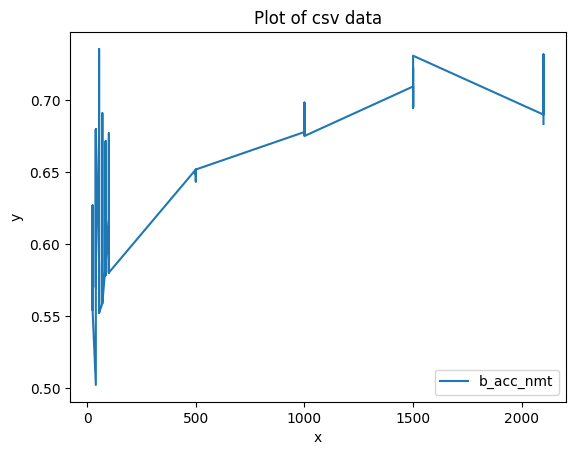

In [3]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file into a dataframe
df = pd.read_csv("output_nmt.csv")


# Sort the dataframe by day in ascending order
df = df.sort_values(by="ids_to_load_train2", ascending=True) # Replace day with the column name of your csv file

# Plot the dataframe using df.plot
df[df['model_name']=='TCN'].plot(x="ids_to_load_train2", y="b_acc_nmt") # Replace x and y with the column names of your csv file

plt.xlabel("x") # Label the x-axis
plt.ylabel("y") # Label the y-axis
plt.title("Plot of csv data") # Give a title to the plot
plt.show() # Show the plot


In [4]:
df.groupby(['model_name','ids_to_load_train2']).count()

seed  n_of_params  b_acc_merge  b_acc_tuh  \
model_name ids_to_load_train2                                              
Deep4Net   25                     6            6            6          6   
           40                     6            6            6          6   
           55                     6            6            6          6   
           70                     6            6            6          6   
           85                     6            6            6          6   
           100                    6            6            6          6   
           500                    5            5            5          5   
           1000                   6            6            6          6   
           1500                   5            5            5          5   
           2100                   4            4            4          4   
EEGNet     25                     3            3            3          3   
           40                     3            3            3          3   
           55                     3            3            3          3   
           70                     3            3            3          3   
           85                     3            3            3          3   
           100                    3            3            3          3   
           500                    3            3            3          3   
           1000                   1            1            1          1   
           1500                   1            1            1          1   
Shallow    25                     3            3            3          3   
           40                     3            3            3          3   
           55                     3            3            3          3   
           70                     3            3            3          3   
           85                     3            3            3          3   
           100                    3            3            3          3   
           500                    3            3            3          3   
           1000                   3            3            3          3   
           1500                   1            1            1          1   
           2100                   2            2            2          2   
TCN        25                     6            6            6          6   
           40                     5            5            5          5   
           55                     6            6            6          6   
           70                     6            6            6          6   
           85                     6            6            6          6   
           100                    6            6            6          6   
           500                    6            6            6          6   
           1000                   4            4            4          4   
           1500                   6            6            6          6   
           2100                   6            6            6          6   

                               b_acc_nmt  
model_name ids_to_load_train2             
Deep4Net   25                          6  
           40                          6  
           55                          6  
           70                          6  
           85                          6  
           100                         6  
           500                         5  
           1000                        6  
           1500                        5  
           2100                        4  
EEGNet     25                          3  
           40                          3  
           55                          3  
           70                          3  
           85                          3  
           100                         3  
           500                         3  
           1000                        1  
           1500                        1  
Shallow    